In [15]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

In [33]:
#image1 = cv2.imread("../Data/open_image_disaster/002a6cf0d401929c.jpg")
#image2 = cv2.imread("../Data/open_image_disaster/b06aa91a6083c7c2.jpg")
#real_image = []


# Declare an augmentation pipeline
transform = A.Compose([
    A.Resize(height = 400, width = 400),
    A.RandomBrightnessContrast(always_apply=False, p=1.0, brightness_limit=(0.00, 0.00), contrast_limit=(-0.2, 0.2), brightness_by_max=False),
    A.SafeRotate(always_apply=True, p=0.5, limit=(-20, 20), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    A.HorizontalFlip(always_apply=False, p=0.5),
    A.CenterCrop(always_apply=True, p=1.0, height=256, width=256)
    #    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0)
    #A.pytorch.transforms.ToTensorV2()
])

transform_o = A.Compose([
    A.Resize(height = 256, width = 256)
])

In [ ]:
augmentation = []
real_image = []

for i in disaster_dataset:
    im_bgr = cv2.imread("../Data/open_image_disaster/" + i +".jpg")
    img = im_bgr[:, :, ::-1]
    real_image.append(img)
    augmentation.append(transform(image=img)["image"])

augmentation = np.array(augmentation)
print(len(augmentation))

plt.figure(figsize=(10,200))

s = 60
e = 70
c = 0
for i in range(s, e):
    
    plt.grid(False)
    plt.subplot(40,2,c*2+1)
    plt.imshow(real_image[i], cmap=plt.cm.binary)
    plt.subplot(40,2,c*2+2)
    plt.imshow(augmentation[i], cmap=plt.cm.binary)
    c+=1

plt.show()

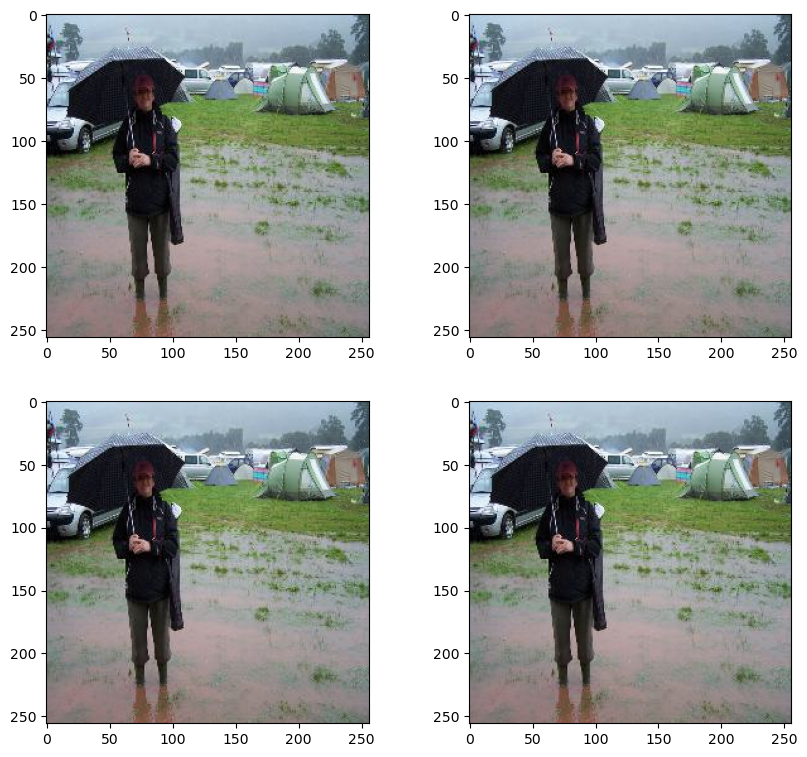

In [37]:
test_img = '000000000731_00'

plt.figure(figsize=(10,200))
im_bgr = cv2.imread("../Data/disaster_images/augmented/" + test_img +".jpg")
img = im_bgr[:, :, ::-1]
plt.subplot(40,2,1)
plt.imshow(transform_o(image=img)['image'], cmap=plt.cm.binary)
for i in range(1,4):
    
    
    plt.grid(False)
    plt.subplot(40,2,i+1)
    plt.imshow(transform_o(image=img)["image"], cmap=plt.cm.binary)

plt.show()

In [12]:
dir_path = "../Data/disaster_images/"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [16]:
disaster_img = pd.DataFrame(img_names, columns=['image_id'])
disaster_img['dir'] = disaster_img['image_id'].apply(lambda x: os.path.dirname(x))
disaster_img['image_id'] = disaster_img['image_id'].apply(lambda x: os.path.basename(x))

disaster_img

,image_id,dir
0,1b24087aa0f9867b.jpg,../Data/disaster_images/open_image_disaster
1,2b3651e8ba31ee65.jpg,../Data/disaster_images/open_image_disaster
2,17dba0da31436843.jpg,../Data/disaster_images/open_image_disaster
3,83b32c162d09a4f8.jpg,../Data/disaster_images/open_image_disaster
4,b8422e374555ab8a.jpg,../Data/disaster_images/open_image_disaster
...,...,...
378,122156386.jpg,../Data/disaster_images/flickr30k_disaster
379,4130537606.jpg,../Data/disaster_images/flickr30k_disaster
380,4922742734.jpg,../Data/disaster_images/flickr30k_disaster
381,3445296377.jpg,../Data/disaster_images/flickr30k_disaster


In [20]:
disaster_img.loc[0]['image_id']

'1b24087aa0f9867b.jpg'

In [25]:
real_img = disaster_img.loc[0]['dir'] +'/'+ disaster_img.loc[0]['image_id']
real_img

'../Data/disaster_images/open_image_disaster/1b24087aa0f9867b.jpg'

In [22]:
disaster_img.dir.iloc[0]

'../Data/disaster_images/open_image_disaster'

#### test

In [36]:
save_path = '../Data/augmented/'

k = 4
for i in range(len(disaster_img)):
    image_id = disaster_img.loc[i]['image_id']
    real_img = disaster_img.loc[i]['dir']  +'/'+ image_id
    im_bgr = cv2.imread(real_img)
    img = im_bgr[:, :, ::-1]
    
    ## origin
    trans_img = transform_o(image=img)['image']
    img_array = Image.fromarray(trans_img.astype(np.uint8))
    img_array.save(os.path.join(save_path, f"{image_id[:-4]}_00.jpg"))
    
    for j in range(1,k):
        trans_img = transform(image=img)['image']
        img_array = Image.fromarray(trans_img.astype(np.uint8))
        img_array.save(os.path.join(save_path, f"{image_id[:-4]}_0{j}.jpg"))
